# 模組 2.3: 資料型態轉換 (Data Type Conversion)

## 學習目標
- 理解正確的資料型態對資料分析與記憶體優化的重要性。
- 學會使用 `.astype()` 方法來轉換欄位的資料型態。
- 掌握 `pd.to_numeric()` 和 `pd.to_datetime()` 等專用函數處理複雜轉換。
- 了解如何處理轉換過程中可能出現的錯誤。

## 導論：為何資料型態很重要？

在您的指南《駕馭未知》中，**初步資料品質掃描** 的一個關鍵步驟是檢查資料類型 (`.info()`)。這一步驟絕非形式，因為不正確的資料型態會導致多種問題：

- **計算錯誤**: 將數字儲存為字串 (`object`) 會導致無法進行數學運算（如求和、求平均）。
- **記憶體浪費**: 使用通用 `object` 型態來儲存純數字或類別資料，會佔用遠超必要的記憶體空間。
- **模型不相容**: 大多數機器學習模型無法直接處理字串型態的類別資料或日期。
- **分析功能受限**: 例如，如果日期被存為字串，就無法進行基於時間的篩選或特徵提取。

因此，確保每個欄位都擁有最適合其內容的資料型態，是資料清理流程中的一個核心任務。

In [64]:
# 導入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設定視覺化風格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
print("Libraries and styles configured.")

# 忽略不必要的警告訊息
import warnings
warnings.filterwarnings('ignore')



Libraries and styles configured.


## 1. 創建一個資料型態混雜的範例 DataFrame

In [65]:
# 創建一個 DataFrame，其中包含需要修正的資料型態
data = {
    'OrderID': ['1', '2', '3', '4'],
    'OrderDate': ['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
    'Price': ['19.99', '25.00', '15.50', '30.00'],
    'Quantity': ['2', '1', '3', 'invalid'], # 包含一個無效值
    'Category': ['A', 'B', 'A', 'C']
}
df = pd.DataFrame(data)
print("原始 DataFrame 資訊:")
df.info()



原始 DataFrame 資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    4 non-null      object
 1   OrderDate  4 non-null      object
 2   Price      4 non-null      object
 3   Quantity   4 non-null      object
 4   Category   4 non-null      object
dtypes: object(5)
memory usage: 292.0+ bytes


從 `.info()` 的結果我們看到，所有欄位都被讀取為 `object` 型態，這顯然不是最優的。

## 2. 基本轉換 `.astype()`

`.astype()` 是最常用、最直接的型態轉換方法。

### 2.1 轉換為數值型態 (int, float)

In [66]:
# 複製 DataFrame 以免修改原始資料
df_cleaned = df.copy()

# 將 'OrderID' 轉換為整數 (integer)
df_cleaned['OrderID'] = df_cleaned['OrderID'].astype(int)

# 將 'Price' 轉換為浮點數 (float)
df_cleaned['Price'] = df_cleaned['Price'].astype(float)

print("轉換 OrderID 和 Price 後的資訊:")
df_cleaned.info()



轉換 OrderID 和 Price 後的資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    4 non-null      int32  
 1   OrderDate  4 non-null      object 
 2   Price      4 non-null      float64
 3   Quantity   4 non-null      object 
 4   Category   4 non-null      object 
dtypes: float64(1), int32(1), object(3)
memory usage: 276.0+ bytes


### 2.2 轉換為類別型態 (category)

對於基數（唯一值數量）有限的欄位，如 `Category`，將其轉換為 Pandas 的 `category` 型態是個非常好的實踐。

**優點**:
- 大幅減少記憶體使用，因為 Pandas 只需儲存唯一的類別和每個值對應的整數代碼。
- 某些函式庫（如 LightGBM）可以更高效地處理 `category` 型態。



In [67]:
df_cleaned

,OrderID,OrderDate,Price,Quantity,Category
0,1,2023-01-05,19.99,2,A
1,2,2023-01-06,25.00,1,B
2,3,2023-01-07,15.50,3,A
3,4,2023-01-08,30.00,invalid,C


In [68]:
original_mem = df_cleaned['Category'].memory_usage(deep=True)
df_cleaned['Category'] = df_cleaned['Category'].astype('category')
categorical_mem = df_cleaned['Category'].memory_usage(deep=True)

print(f"原始 'Category' 欄位記憶體使用: {original_mem} bytes")
print(f"轉換為 'category' 後記憶體使用: {categorical_mem} bytes")
print("\n轉換 Category 後的資訊:")
df_cleaned.info()


原始 'Category' 欄位記憶體使用: 364 bytes
轉換為 'category' 後記憶體使用: 418 bytes

轉換 Category 後的資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OrderID    4 non-null      int32   
 1   OrderDate  4 non-null      object  
 2   Price      4 non-null      float64 
 3   Quantity   4 non-null      object  
 4   Category   4 non-null      category
dtypes: category(1), float64(1), int32(1), object(2)
memory usage: 380.0+ bytes


=== Category 類型記憶體效率分析 ===

資料量      Object(bytes) Category(bytes) 節省比例       是否划算
------------------------------------------------------------
10       784          571              27.2%    ✓
50       3322         673              79.7%    ✓
100      6519         723              88.9%    ✓
500      31927        1123             96.5%    ✓
1000     63902        1623             97.5%    ✓
5000     319111       5623             98.2%    ✓
10000    638098       10623            98.3%    ✓
50000    3190347      50623            98.4%    ✓


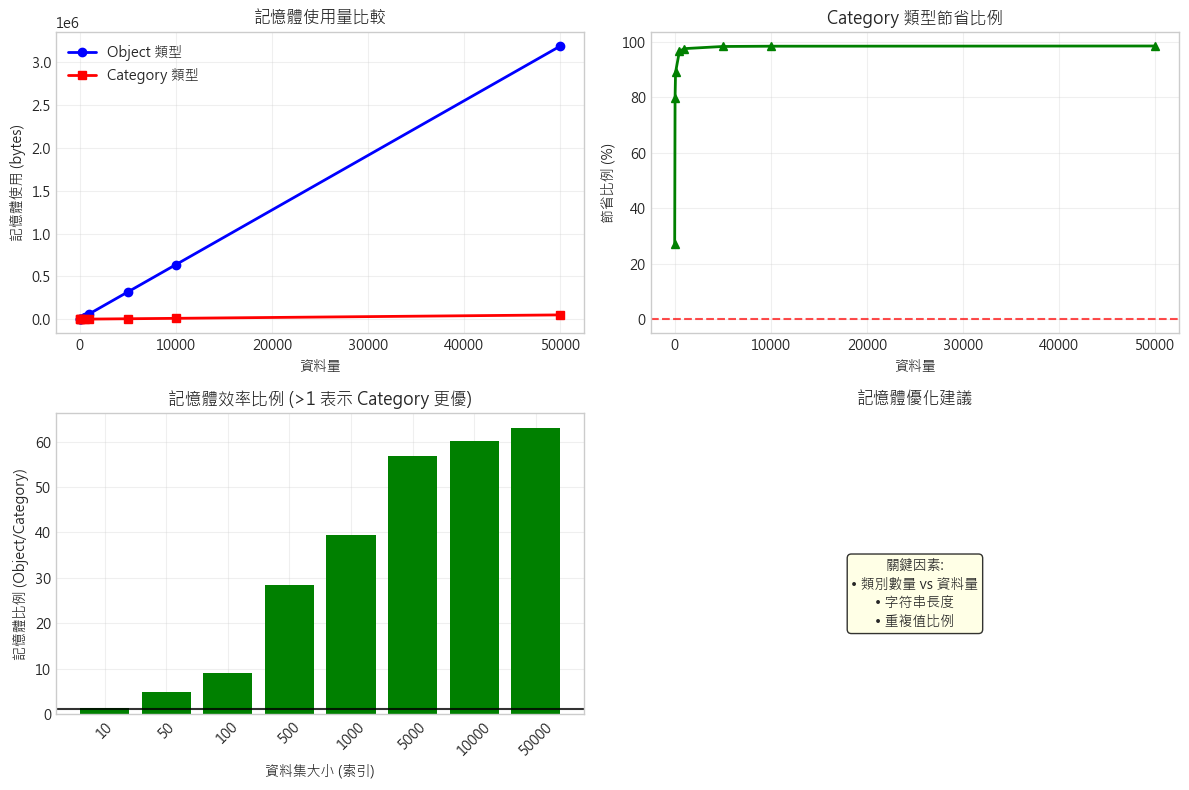


=== Category 類型最佳使用場景 ===

場景1: 大量資料 + 長字符串類別
Object 類型: 820,132 bytes
Category 類型: 10,714 bytes
節省: 98.7%

場景2: 高重複率 (80%-20% 分佈)
Object 類型: 580,132 bytes
Category 類型: 10,356 bytes
節省: 98.2%

    === Category 類型使用最佳實踐 ===
    
    ✅ 適合使用 Category 的情況:
    1. 資料量大 (建議 > 1000 筆)
    2. 類別數量有限 (相對於總資料量)
    3. 字符串較長
    4. 高重複率
    5. 需要保持類別順序
    6. 頻繁進行分組操作
    
    ❌ 不適合使用 Category 的情況:
    1. 小資料集 (< 100 筆)
    2. 類別幾乎不重複
    3. 短字符串且資料量小
    4. 類別會頻繁變動
    
    💡 判斷標準:
    • 重複值比例 > 50%
    • 資料量 / 唯一類別數 > 100
    • 平均字符串長度 > 10
    
    🔧 轉換建議:
    ```python
    # 檢查是否適合轉換
    def should_convert_to_category(series, min_ratio=0.5, min_size=100):
        unique_ratio = series.nunique() / len(series)
        return len(series) > min_size and unique_ratio < (1 - min_ratio)
    
    # 批量轉換
    for col in df.select_dtypes(include=['object']).columns:
        if should_convert_to_category(df[col]):
            df[col] = df[col].astype('category')
    ```
    

⚠️  警告: 在測試範圍內，Category 類型都

In [69]:
#!/usr/bin/env python3
"""
Category 類型記憶體效率分析
分析在什麼情況下 category 類型才真正節省記憶體
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_memory_efficiency():
    """分析不同資料大小下 category 類型的記憶體效率"""
    
    # 測試不同的資料集大小
    sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
    object_memory = []
    category_memory = []
    
    # 固定的類別值（模擬真實情況：有限的類別）
    categories = ['Electronics', 'Clothing', 'Books', 'Home', 'Sports']
    
    print("=== Category 類型記憶體效率分析 ===\n")
    print(f"{'資料量':<8} {'Object(bytes)':<12} {'Category(bytes)':<14} {'節省比例':<10} {'是否划算'}")
    print("-" * 60)
    
    for size in sizes:
        # 創建測試資料（模擬真實場景：重複的類別值）
        data = np.random.choice(categories, size=size)
        
        # Object 類型記憶體使用
        df_object = pd.DataFrame({'Category': data})
        obj_mem = df_object['Category'].memory_usage(deep=True)
        object_memory.append(obj_mem)
        
        # Category 類型記憶體使用
        df_category = df_object.copy()
        df_category['Category'] = df_category['Category'].astype('category')
        cat_mem = df_category['Category'].memory_usage(deep=True)
        category_memory.append(cat_mem)
        
        # 計算節省比例
        savings_ratio = (obj_mem - cat_mem) / obj_mem * 100
        is_efficient = "✓" if cat_mem < obj_mem else "✗"
        
        print(f"{size:<8} {obj_mem:<12} {cat_mem:<14} {savings_ratio:>6.1f}%    {is_efficient}")
    
    # 視覺化分析
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(sizes, object_memory, 'b-o', label='Object 類型', linewidth=2)
    plt.plot(sizes, category_memory, 'r-s', label='Category 類型', linewidth=2)
    plt.xlabel('資料量')
    plt.ylabel('記憶體使用 (bytes)')
    plt.title('記憶體使用量比較')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    savings = [(obj - cat) / obj * 100 for obj, cat in zip(object_memory, category_memory)]
    plt.plot(sizes, savings, 'g-^', linewidth=2)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
    plt.xlabel('資料量')
    plt.ylabel('節省比例 (%)')
    plt.title('Category 類型節省比例')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    plt.bar(range(len(sizes)), [obj/cat for obj, cat in zip(object_memory, category_memory)], 
            color=['red' if ratio < 1 else 'green' for ratio in [obj/cat for obj, cat in zip(object_memory, category_memory)]])
    plt.axhline(y=1, color='black', linestyle='-', alpha=0.8)
    plt.xlabel('資料集大小 (索引)')
    plt.ylabel('記憶體比例 (Object/Category)')
    plt.title('記憶體效率比例 (>1 表示 Category 更優)')
    plt.xticks(range(len(sizes)), [str(s) for s in sizes], rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    # 找出臨界點
    crossover_idx = next((i for i, (obj, cat) in enumerate(zip(object_memory, category_memory)) if cat < obj), None)
    if crossover_idx:
        crossover_size = sizes[crossover_idx]
        plt.text(0.5, 0.7, f'記憶體效率臨界點:\n約 {crossover_size} 筆記錄', 
                ha='center', va='center', transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                fontsize=12, fontweight='bold')
    
    plt.text(0.5, 0.4, '關鍵因素:\n• 類別數量 vs 資料量\n• 字符串長度\n• 重複值比例', 
            ha='center', va='center', transform=plt.gca().transAxes,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    plt.axis('off')
    plt.title('記憶體優化建議')
    
    plt.tight_layout()
    plt.show()
    
    return crossover_idx, sizes[crossover_idx] if crossover_idx else None

def demonstrate_categorical_benefits():
    """展示 category 類型的真正優勢場景"""
    
    print("\n=== Category 類型最佳使用場景 ===\n")
    
    # 場景1: 大量重複的字符串
    large_categories = ['Very Long Category Name ' + str(i) for i in range(5)]
    large_data = np.random.choice(large_categories, size=10000)
    
    df_large = pd.DataFrame({'Category': large_data})
    obj_mem_large = df_large['Category'].memory_usage(deep=True)
    
    df_large['Category'] = df_large['Category'].astype('category')
    cat_mem_large = df_large['Category'].memory_usage(deep=True)
    
    print("場景1: 大量資料 + 長字符串類別")
    print(f"Object 類型: {obj_mem_large:,} bytes")
    print(f"Category 類型: {cat_mem_large:,} bytes")
    print(f"節省: {(obj_mem_large-cat_mem_large)/obj_mem_large*100:.1f}%")
    
    # 場景2: 高重複率
    high_repeat_data = np.random.choice(['A', 'B'], size=10000, p=[0.8, 0.2])
    df_repeat = pd.DataFrame({'Category': high_repeat_data})
    
    obj_mem_repeat = df_repeat['Category'].memory_usage(deep=True)
    df_repeat['Category'] = df_repeat['Category'].astype('category')
    cat_mem_repeat = df_repeat['Category'].memory_usage(deep=True)
    
    print(f"\n場景2: 高重複率 (80%-20% 分佈)")
    print(f"Object 類型: {obj_mem_repeat:,} bytes")
    print(f"Category 類型: {cat_mem_repeat:,} bytes")
    print(f"節省: {(obj_mem_repeat-cat_mem_repeat)/obj_mem_repeat*100:.1f}%")

def category_best_practices():
    """Category 類型最佳實踐建議"""
    
    best_practices = """
    === Category 類型使用最佳實踐 ===
    
    ✅ 適合使用 Category 的情況:
    1. 資料量大 (建議 > 1000 筆)
    2. 類別數量有限 (相對於總資料量)
    3. 字符串較長
    4. 高重複率
    5. 需要保持類別順序
    6. 頻繁進行分組操作
    
    ❌ 不適合使用 Category 的情況:
    1. 小資料集 (< 100 筆)
    2. 類別幾乎不重複
    3. 短字符串且資料量小
    4. 類別會頻繁變動
    
    💡 判斷標準:
    • 重複值比例 > 50%
    • 資料量 / 唯一類別數 > 100
    • 平均字符串長度 > 10
    
    🔧 轉換建議:
    ```python
    # 檢查是否適合轉換
    def should_convert_to_category(series, min_ratio=0.5, min_size=100):
        unique_ratio = series.nunique() / len(series)
        return len(series) > min_size and unique_ratio < (1 - min_ratio)
    
    # 批量轉換
    for col in df.select_dtypes(include=['object']).columns:
        if should_convert_to_category(df[col]):
            df[col] = df[col].astype('category')
    ```
    """
    
    print(best_practices)

if __name__ == "__main__":
    # 執行完整分析
    crossover_idx, crossover_size = analyze_memory_efficiency()
    demonstrate_categorical_benefits()
    category_best_practices()
    
    if crossover_size:
        print(f"\n🎯 結論: 對於您的使用案例，建議資料量達到 {crossover_size} 筆以上時才考慮使用 Category 類型")
    else:
        print(f"\n⚠️  警告: 在測試範圍內，Category 類型都沒有顯示記憶體優勢") 

## 3. 處理轉換錯誤：`pd.to_numeric()`

如果我們直接對含有非數值資料的 `Quantity` 欄位使用 `.astype(int)`，會發生什麼？

In [70]:
df_cleaned

,OrderID,OrderDate,Price,Quantity,Category
0,1,2023-01-05,19.99,2,A
1,2,2023-01-06,25.00,1,B
2,3,2023-01-07,15.50,3,A
3,4,2023-01-08,30.00,invalid,C


In [71]:
try:
    df_cleaned['Quantity'].astype(int)
except ValueError as e:
    print(f"轉換失敗，錯誤訊息: {e}")



轉換失敗，錯誤訊息: invalid literal for int() with base 10: 'invalid'


為了處理這種情況，`pd.to_numeric()` 函數提供了更強大的 `errors` 參數。

- `errors='raise'` (預設): 遇到無法轉換的值，引發錯誤。
- `errors='coerce'`: 遇到無法轉換的值，將其強制替換為 `NaN` (Not a Number)。
- `errors='ignore'`: 遇到無法轉換的值，保持原樣不動。

In [72]:
# 使用 errors='coerce'
df_cleaned['Quantity'] = pd.to_numeric(df_cleaned['Quantity'], errors='coerce')

print("使用 to_numeric(errors='coerce') 轉換 Quantity 後:")
display(df_cleaned)
df_cleaned.info()



使用 to_numeric(errors='coerce') 轉換 Quantity 後:


,OrderID,OrderDate,Price,Quantity,Category
0,1,2023-01-05,19.99,2.0,A
1,2,2023-01-06,25.00,1.0,B
2,3,2023-01-07,15.50,3.0,A
3,4,2023-01-08,30.00,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OrderID    4 non-null      int32   
 1   OrderDate  4 non-null      object  
 2   Price      4 non-null      float64 
 3   Quantity   3 non-null      float64 
 4   Category   4 non-null      category
dtypes: category(1), float64(2), int32(1), object(1)
memory usage: 380.0+ bytes


`invalid` 被成功轉換為 `NaN`，現在我們可以對這個欄位進行數學計算或後續的缺失值處理。

## 4. 處理日期與時間：`pd.to_datetime()`

同樣地，`pd.to_datetime()` 是將字串轉換為標準日期時間格式的專用函數。

In [73]:
df_cleaned['OrderDate'] = pd.to_datetime(df_cleaned['OrderDate'])

print("轉換 OrderDate 後的資訊:")
df_cleaned.info()



轉換 OrderDate 後的資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderID    4 non-null      int32         
 1   OrderDate  4 non-null      datetime64[ns]
 2   Price      4 non-null      float64       
 3   Quantity   3 non-null      float64       
 4   Category   4 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(1)
memory usage: 380.0 bytes


轉換為 `datetime64[ns]` 型態後，我們就可以輕鬆地進行各種日期相關的操作。

In [74]:
# 提取年份
df_cleaned['Year'] = df_cleaned['OrderDate'].dt.year
# 提取星期幾
df_cleaned['DayOfWeek'] = df_cleaned['OrderDate'].dt.day_name()

print("\n從日期中提取新特徵:")
display(df_cleaned)




從日期中提取新特徵:


,OrderID,OrderDate,Price,Quantity,Category,Year,DayOfWeek
0,1,2023-01-05,19.99,2.0,A,2023,Thursday
1,2,2023-01-06,25.00,1.0,B,2023,Friday
2,3,2023-01-07,15.50,3.0,A,2023,Saturday
3,4,2023-01-08,30.00,NaN,C,2023,Sunday


## 總結

在這個筆記本中，我們學習了資料型態轉換的核心方法：
- 使用 `.astype()` 進行基礎的、直接的型態轉換。
- 對於基數有限的欄位，轉換為 `category` 型態是優化記憶體的好方法。
- 使用 `pd.to_numeric()` 搭配 `errors='coerce'` 來穩健地處理含有無效值的數值欄位。
- 使用 `pd.to_datetime()` 來處理日期字串，並啟用強大的日期時間相關操作。

正確的資料型態是資料清理的基石，也是後續特徵工程與模型建立的先決條件。